In [ ]:
BASE_PATH = "/content/drive/MyDrive/Académico/UNIR/MUQC/99 - TFM/dev"

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf

In [ ]:
RANDOM_SEED = 1234

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
#tf.random.set_seed(RANDOM_SEED)

In [ ]:
PCA_COMPONENTS = 8

In [ ]:
df_tr_day_syn_resampled = pd.read_csv(BASE_PATH + "/dataset/tr_day_syn.csv")

In [ ]:
df_test_day_syn_resampled = pd.read_csv(BASE_PATH + "/dataset/test_day_syn.csv")

In [ ]:
x_tr = df_tr_day_syn_resampled.drop(columns = " Label").to_numpy()

In [ ]:
y_tr = df_tr_day_syn_resampled[" Label"].to_numpy()

In [ ]:
x_test = df_test_day_syn_resampled.drop(columns = " Label").to_numpy()

In [ ]:
y_test = df_test_day_syn_resampled[" Label"].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size = 0.5, stratify = y_test)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
scaler = MaxAbsScaler()
x_tr = scaler.fit_transform(x_tr)

x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [ ]:
x_test = np.clip(x_test, 0, 1)
x_val = np.clip(x_val, 0, 1)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = PCA_COMPONENTS)

In [ ]:
start = time.time()

xs_tr = pca.fit_transform(x_tr)
xs_test = pca.transform(x_test)
xs_val = pca.transform(x_val)

end = time.time()
print(f"Elapsed time: {end - start} s")

Elapsed time: 0.5251810550689697 s


In [ ]:
from sklearn import svm

model = svm.SVC(kernel = "rbf")

In [ ]:
start = time.time()

In [ ]:
model.fit(xs_tr, y_tr)

SVC()

In [ ]:
end = time.time()
print(f"Elapsed time: {end - start} s")

Elapsed time: 0.9762485027313232 s


In [ ]:
from sklearn.metrics import accuracy_score

start = time.time()

tr_acc = accuracy_score(model.predict(xs_tr) >= 0.5, y_tr)
val_acc = accuracy_score(model.predict(xs_val) >= 0.5, y_val)
test_acc = accuracy_score(model.predict(xs_test) >= 0.5, y_test)

end = time.time()
print(f"Elapsed time: {end - start} s")

Elapsed time: 1.2178335189819336 s


In [ ]:
print("Train accuracy:", tr_acc)
print("Validation accuracy:", val_acc)
print("Test accuracy:", test_acc)

Train accuracy: 0.9992
Validation accuracy: 0.9907
Test accuracy: 0.9926


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
start = time.time()

output = model.predict(xs_test)
result = (output > 0.5).astype(float)

end = time.time()
print(f"Elapsed time: {end - start} s")

Elapsed time: 0.13315963745117188 s


In [ ]:
confusion_matrix(y_true = y_test, y_pred = result)

array([[8927,   73],
       [   1,  999]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test, y_pred = result))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9000
           1       0.93      1.00      0.96      1000

    accuracy                           0.99     10000
   macro avg       0.97      1.00      0.98     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
from sklearn.metrics import roc_curve

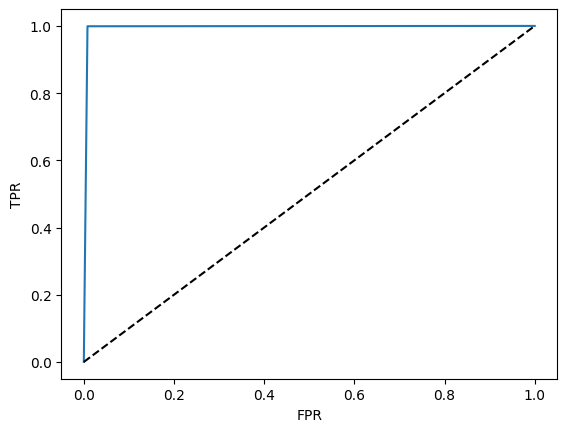

In [ ]:
fpr, tpr, _ = roc_curve(y_test, output)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = "--", color = "black")
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.show()

In [ ]:
from sklearn.metrics import auc

print(auc(fpr, tpr))

0.9954444444444446
